In [1]:
import math
import pandas as pd
df=pd.read_excel(r"C:\Users\ADMIN DELL\Downloads\Entropy.xlsx")
def calculate_entropy_for_attribute(data, attribute_index):
    attribute_values=set(data.iloc[:, attribute_index])
    entropy = 0.0
    for value in attribute_values:
        subset=data[data.iloc[:, attribute_index]==value]
        total_samples=len(subset)
        class_counts=subset['buys_computer'].value_counts()
        value_entropy = 0.0
        for count in class_counts:
            probability=count/total_samples
            value_entropy=value_entropy-probability*math.log2(probability)
        weight=total_samples/len(data)
        entropy=entropy+weight * value_entropy
    return entropy
num_attributes=len(df.columns) - 1
entropies=[]
for i in range(num_attributes):
    entropy=calculate_entropy_for_attribute(df, i)
    entropies.append(entropy)
attribute_names = df.columns[:-1] 
for i in range(num_attributes):
    print(f"Entropy for {attribute_names[i]}: {entropies[i]}")

Entropy for age: 0.6935361388961918
Entropy for income: 0.9110633930116763
Entropy for student: 0.7884504573082896
Entropy for credit_rating: 0.8921589282623617


In [2]:
root_feature_index=entropies.index(min(entropies))
root_feature_name=attribute_names[root_feature_index]
print(f"The first feature for constructing the decision tree is = {root_feature_name}")

The first feature for constructing the decision tree is = age


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
x=df.drop(columns=['buys_computer'])
y=df['buys_computer']
x_encoded=pd.get_dummies(x)
clf=DecisionTreeClassifier()
clf.fit(x_encoded, y)
tree_depth = clf.get_depth()
print(f"The depth of the constructed decision tree is = {tree_depth}")

The depth of the constructed decision tree is = 4


Training Set Accuracy: 1.0
Test Set Accuracy: 0.7496159754224271


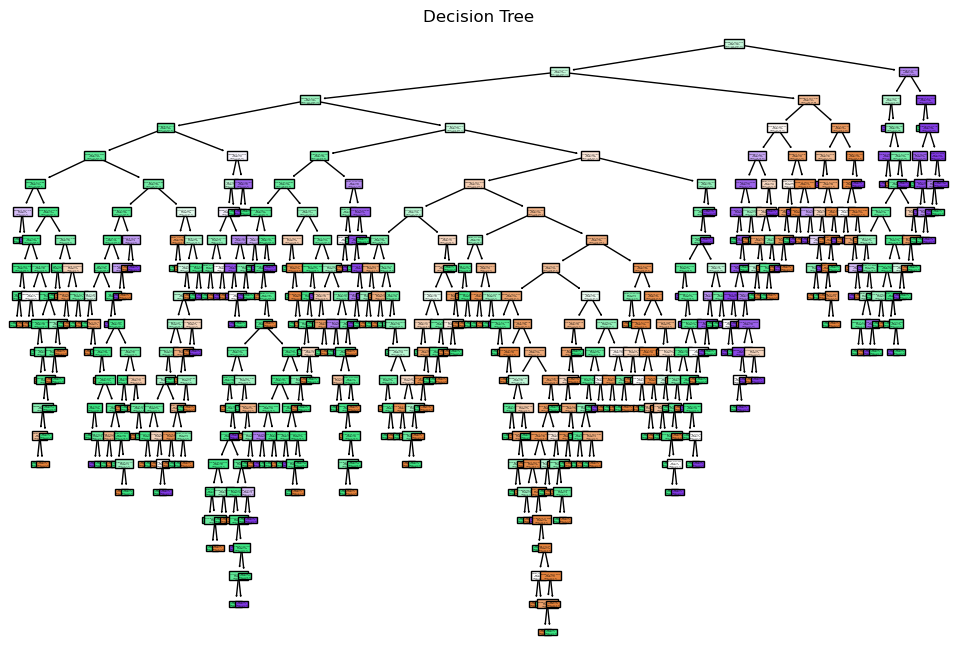

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
data=pd.read_excel(r"C:\Users\ADMIN DELL\Downloads\GLCM_extended_dataset_31-01-2023.xlsx")
X = data.drop('label', axis=1)
y = data['label']
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy:", training_accuracy)
test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy:", test_accuracy)
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=[str(i) for i in range(10)])
plt.title("Decision Tree")
plt.show()

Training Set Accuracy =  0.7794004611837049
Test Set Accuracy =  0.7480798771121352


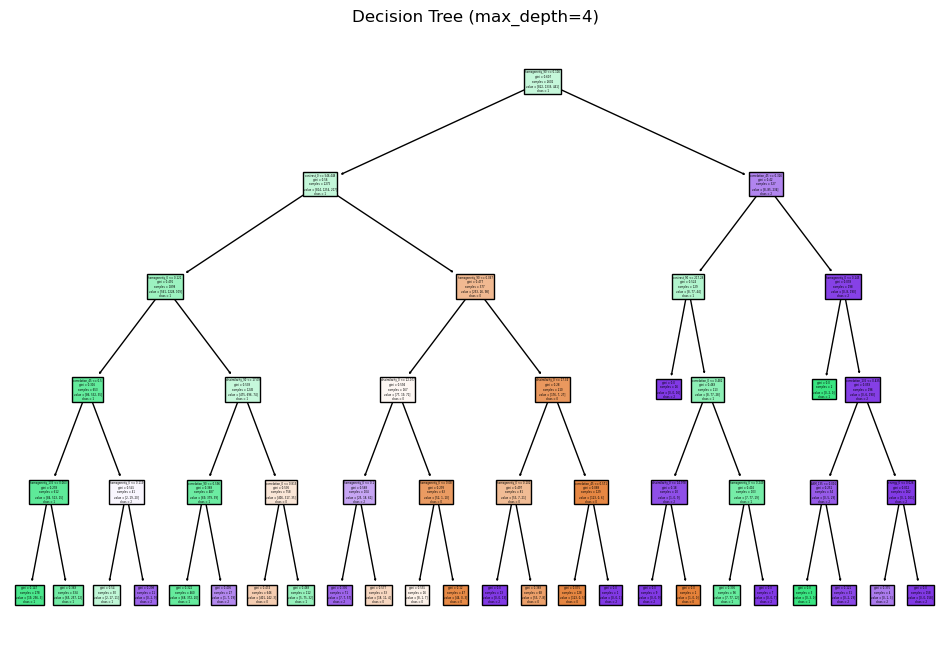

In [11]:
data = pd.read_excel(r"C:\Users\ADMIN DELL\Downloads\GLCM_extended_dataset_31-01-2023.xlsx")
X = data.drop('label', axis=1)
y = data['label']
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=5)
model.fit(Tr_X, Tr_y)
training_accuracy = model.score(Tr_X, Tr_y)
print("Training Set Accuracy = ", training_accuracy)
test_accuracy = model.score(Te_X, Te_y)
print("Test Set Accuracy = ", test_accuracy)
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=[str(i) for i in range(10)])
plt.title("Decision Tree (max_depth=4)")
plt.show()

Training Set Accuracy =  1.0
Test Set Accuracy =  0.7265745007680492


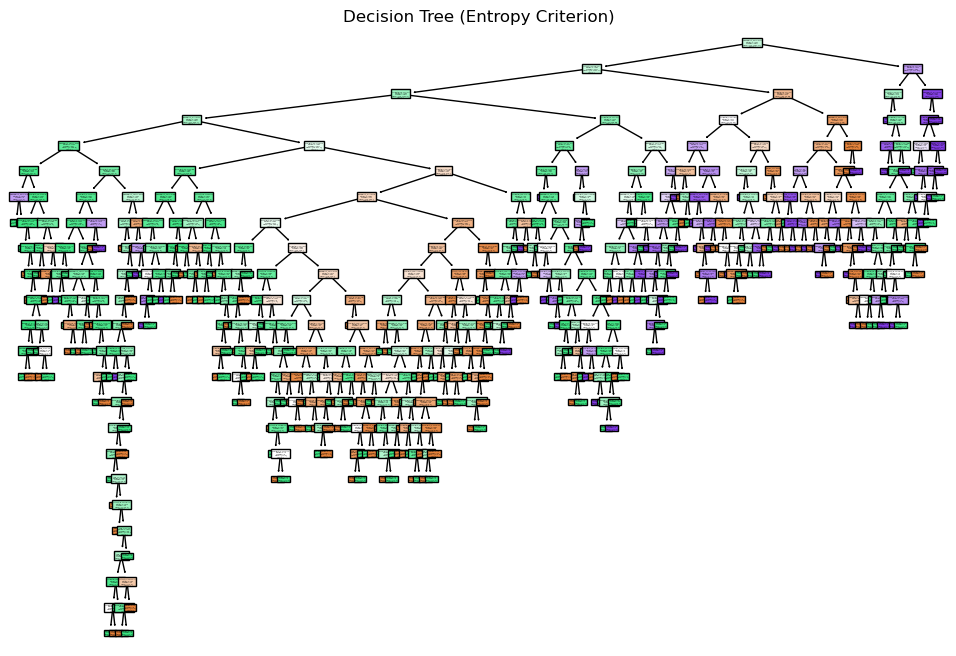

In [13]:
data = pd.read_excel(r"C:\Users\ADMIN DELL\Downloads\GLCM_extended_dataset_31-01-2023.xlsx")
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)
training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
print("Training Set Accuracy = ", training_accuracy_entropy)
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)
print("Test Set Accuracy = ", test_accuracy_entropy)
plt.figure(figsize=(12, 8))
tree.plot_tree(model_entropy, filled=True, feature_names=X.columns.tolist(), class_names=[str(i) for i in range(10)])
plt.title("Decision Tree (Entropy Criterion)")
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(Tr_X, Tr_y)
dt_predictions = dt_classifier.predict(Te_X)

dt_accuracy = accuracy_score(Te_y, dt_predictions)
dt_precision = precision_score(Te_y, dt_predictions, average='weighted')
dt_recall = recall_score(Te_y, dt_predictions, average='weighted')
dt_f1 = f1_score(Te_y, dt_predictions, average='weighted')

print("Decision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(Tr_X, Tr_y)
rf_predictions = rf_classifier.predict(Te_X)

rf_accuracy = accuracy_score(Te_y, rf_predictions)
rf_precision = precision_score(Te_y, rf_predictions, average='weighted')
rf_recall = recall_score(Te_y, rf_predictions, average='weighted')
rf_f1 = f1_score(Te_y, rf_predictions, average='weighted')

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Decision Tree Metrics:
Accuracy: 0.7557603686635944
Precision: 0.757226143340586
Recall: 0.7557603686635944
F1 Score: 0.7554991515511484

Random Forest Metrics:
Accuracy: 0.8248847926267281
Precision: 0.8284803676360383
Recall: 0.8248847926267281
F1 Score: 0.8243986635208375
